In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# DATA

# MODELING PARAMS

In [853]:
tau = 0.0001
T = 10
gamma = 0.2
alpha = 0.2
beta = 0.02

# MODEL

In [854]:
def update(flows, wage, rent, travel): # Euler method
    
    wage_total = wage.sum()
    rent_total = rent.sum()
    
    df      = np.square(flows) * (wage - rent - travel)
    df      = df - df.mean()
    flows  += tau * df # centered, not sure if this is really the best way to conserve flow
    wage    = np.array([sum([flows.sum(axis = 0)[i] for i in nx.ego_graph(G, j).nodes()]) for j in nodes])
    rent    = np.array([sum([flows.sum(axis = 1)[i] for i in nx.ego_graph(G, j).nodes()]) for j in nodes])
    rent    = rent.reshape(n,1)
    
    rent   *= rent_total / rent.sum()
    wage   *= wage_total / wage.sum()
    
    travel  = 1 * np.square(flows) * dists

    return flows, travel, wage, rent

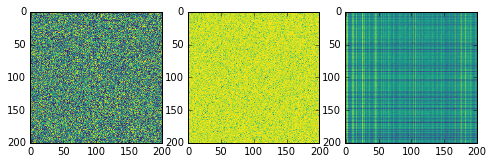

In [855]:
# G = nx.frucht_graph()
# G = nx.desargues_graph()
# G = nx.bull_graph()
G = nx.watts_strogatz_graph(200, 5, .5)
nodes = G.nodes()
n = len(nodes)

wage = np.random.exponential(1, n) * 3
rent = np.random.exponential(1, n) * 3
rent = rent.reshape(n, 1)

travel = np.random.rand(n,n)
flows = np.random.rand(n,n) + 1

dists = np.random.exponential(1, (n,n))

fig = plt.figure(figsize = (8, 4))
ax = fig.add_subplot(131)
ax.imshow(flows, cmap = 'viridis')
ax = fig.add_subplot(132)
ax.imshow(dists, cmap = 'viridis_r')
ax = fig.add_subplot(133)
ax.imshow(wage - rent - dists, cmap = 'viridis')

398.8449 7.1676
399.853 7.1676
400.4922 7.1675
400.9362 7.1675
401.2794 7.1675
401.5458 7.1675
401.8106 7.1675
401.9666 7.1675
402.1447 7.1675
402.2594 7.1675
402.3981 7.1675
402.4736 7.1675
402.5376 7.1675
402.6016 7.1675
402.6656 7.1675
402.719 7.1675
402.748 7.1675
402.7935 7.1675
402.8028 7.1675
402.8185 7.1675
402.8278 7.1675
402.8401 7.1675
402.8697 7.1675
402.8978 7.1675
402.9157 7.1675
402.9152 7.1675
402.9282 7.1675
402.9512 7.1675
402.9609 7.1675
402.9689 7.1675
402.9902 7.1675
403.02 7.1675
403.045 7.1675
403.0646 7.1675
403.0943 7.1675
403.1185 7.1675
403.145 7.1675
403.1729 7.1675
403.1926 7.1675
403.2103 7.1675
403.2361 7.1675
403.264 7.1675
403.2837 7.1675
403.3068 7.1675
403.3198 7.1675
403.3328 7.1675
403.3441 7.1675
403.3605 7.1675
403.373 7.1675
403.3827 7.1675
403.3907 7.1675
403.3937 7.1675
403.3984 7.1675
403.4031 7.1675
403.4078 7.1675
403.4108 7.1675
403.4156 7.1675
403.4153 7.1675
403.415 7.1675
403.4147 7.1675
403.4161 7.1675
403.4158 7.1675
403.4155 7.1675
40

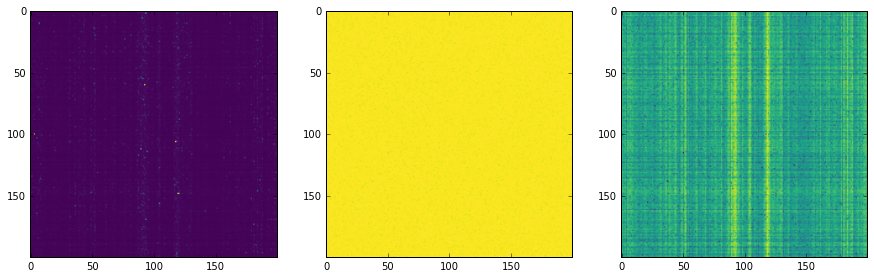

In [882]:
for i in range(50000):
    flows, travel, wage, rent = update(flows, wage, rent, travel)
    flows = np.round(flows, 4)
    travel = np.round(travel, 4)
    wage = np.round(wage, 4)
    rent = np.round(rent, 4)
    if i % 500 == 0:
        print flows.max(), travel.max()
fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot(131)
ax.imshow(flows, cmap = 'viridis', vmin = 0, vmax = flows.max()/4)
ax = fig.add_subplot(132)
ax.imshow(dists, cmap = 'viridis_r', vmin = 0, vmax = flows.max()/4)
ax = fig.add_subplot(133)
ax.imshow(wage - rent - dists, cmap = 'viridis')

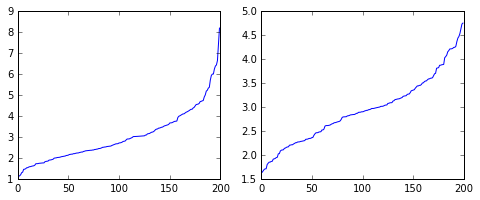

In [883]:
fig = plt.figure(figsize = (8, 3))
ax = fig.add_subplot(121)
sorted_wage = wage.copy()
sorted_wage.sort()
ax.plot(sorted_wage)

ax = fig.add_subplot(122)
sorted_rent = rent.copy()
sorted_rent = sorted_rent.reshape(1,n)
sorted_rent.sort()
ax.plot(sorted_rent.tolist()[0])

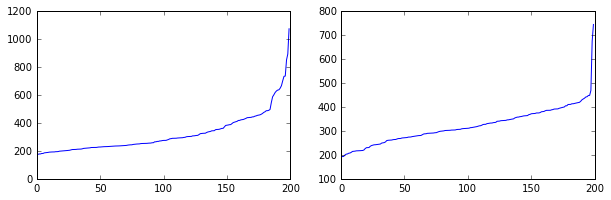

In [884]:
fig = plt.figure(figsize = (10,3))
ax = fig.add_subplot(121)
ax.plot(np.sort(flows.sum(axis = 0)))

ax = fig.add_subplot(122)
ax.plot(np.sort(flows.sum(axis = 1)))

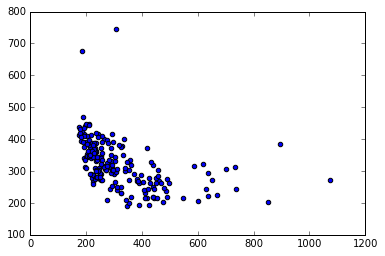

In [885]:
plt.scatter(flows.sum(axis = 0), flows.sum(axis = 1))

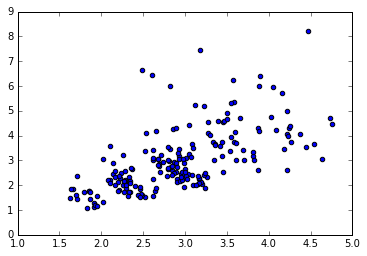

In [886]:
plt.scatter(rent, wage)